# Cricket plotting

In [1]:
import csv

In [2]:
fh = open('335982.csv')

- ball,1,0.1,Kolkata Knight Riders,SC Ganguly,BB McCullum,P Kumar,0,1,"",""


- take only innings, ball, runs of bat and extras

In [3]:
fh.seek(0)
data = [ [int(line[1]), int(float(line[2])), int(line[7]) + int(line[8])] for line in csv.reader(fh) if 'ball' in line and line[1] == '1']
fh.seek(0)
wickets = [[int(float(line[2])), 1] for line in csv.reader(fh) if 'ball' in line and line[1] == '1' and line[9]]

fh.seek(0)
data2 = [ [int(line[1]), int(float(line[2])), int(line[7]) + int(line[8])] for line in csv.reader(fh) if 'ball' in line and line[1] == '2']
fh.seek(0)
wickets2 = [[int(float(line[2])), 1] for line in csv.reader(fh) if 'ball' in line and line[1] == '2' and line[9]]



In [16]:
data[:10]

[[1, 0, 1],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 1],
 [1, 1, 0],
 [1, 1, 4],
 [1, 1, 4]]

In [4]:
wickets = dict(wickets)
wickets2 = dict(wickets2)

In [5]:
wickets, wickets2

({5: 1, 12: 1, 17: 1},
 {1: 1, 2: 1, 4: 1, 5: 1, 7: 1, 8: 1, 11: 1, 13: 1, 15: 1})

In [6]:
wickets[5.1] =1

In [48]:
wickets

{5: 1, 12: 1, 17: 1, 5.1: 1}

In [7]:
d = {}
for line in data:
    if line[1] in d:
        d[line[1]] = d[line[1]] + line[2]
    else:
        d[line[1]] = line[2]

In [20]:
d[0], d[1]

(3, 18)

- creating our own dictionary which accumulates value if already present

In [8]:
class RunAccumulate(dict):
    def __setitem__(self, key, val):
        if key in self:
            val = val + self[key]
        dict.__setitem__(self, key, val)

- Just a test

In [9]:
m = RunAccumulate()
m[0] = 10
print(m)
m[0]=5
print(m)

{0: 10}
{0: 15}


- latest correct code

In [10]:
d = RunAccumulate()
for line in data:
    d[line[1]+1] = line[2]
print(d)

{1: 3, 2: 18, 3: 6, 4: 23, 5: 10, 6: 1, 7: 7, 8: 5, 9: 4, 10: 10, 11: 15, 12: 10, 13: 12, 14: 6, 15: 24, 16: 4, 17: 14, 18: 7, 19: 21, 20: 22}


In [11]:
d2 = RunAccumulate()
for line in data2:
    d2[line[1]+1] = line[2]
print(d2)

{1: 4, 2: 5, 3: 3, 4: 4, 5: 8, 6: 2, 7: 7, 8: 5, 9: 5, 10: 8, 11: 5, 12: 3, 13: 11, 14: 7, 15: 4, 16: 1}


In [12]:
print(sum(d2.values()))

82


In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

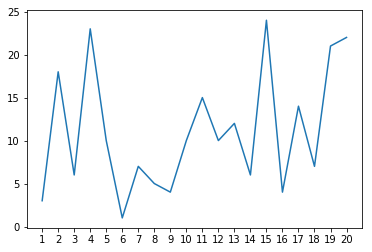

In [15]:
plt.xticks(list(d.keys()))
plt.plot(d.keys(), d.values())

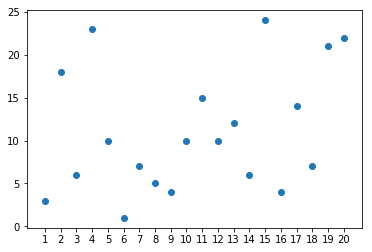

In [16]:
plt.xticks(list(d.keys()))
plt.scatter(d.keys(), d.values())

In [17]:
import numpy as np

In [18]:
d.keys(), d2.keys()

(dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]))

In [19]:
x1 = np.array(list(d.keys())) - 0.2
x2 =np.array(list(d2.keys())) + 0.2

In [20]:
x1, x2

(array([ 0.8,  1.8,  2.8,  3.8,  4.8,  5.8,  6.8,  7.8,  8.8,  9.8, 10.8,
        11.8, 12.8, 13.8, 14.8, 15.8, 16.8, 17.8, 18.8, 19.8]),
 array([ 1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2, 11.2,
        12.2, 13.2, 14.2, 15.2, 16.2]))

In [21]:
x1 - 0.1

array([ 0.7,  1.7,  2.7,  3.7,  4.7,  5.7,  6.7,  7.7,  8.7,  9.7, 10.7,
       11.7, 12.7, 13.7, 14.7, 15.7, 16.7, 17.7, 18.7, 19.7])

In [22]:
d2

{1: 4,
 2: 5,
 3: 3,
 4: 4,
 5: 8,
 6: 2,
 7: 7,
 8: 5,
 9: 5,
 10: 8,
 11: 5,
 12: 3,
 13: 11,
 14: 7,
 15: 4,
 16: 1}

<BarContainer object of 16 artists>

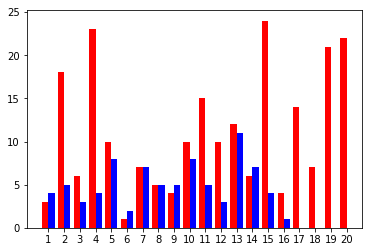

In [20]:
plt.xticks(list(d.keys()))


plt.bar(x1, d.values(), width=0.4, zorder = 0, color='red')
plt.bar(x2, d2.values(), width=0.4, zorder = 0, color='b')

#plt.scatter(np.array(list(wickets.keys())) - 0.2, wickets.values(), zorder =1, color='yellow')